## Forces for a Triangluar Camming Device

Approximation of a Tricam. 

It is simplest to start modeling the tricam as a triangle with the force applied straight down from the top. It's not clear that this simplification is warranted, but it gives a chance to get some results for a similar shaped object and similar mode of camming.

Unlike the SLCD in symmetric placement, because of the lack of symmetry, we have an underconstrained system (thanks to @RadostW for pointing this out).

In order to give the simplified rigid body FBD enough constraints to be solved, a coefficient of friction $\mu$ is used for the right side to relate $F_n$ and $F_{R,y}$. 

$
F_{R,y} = \mu F_n
$ 

It's not clear that this choice is entirely warranted, though it allows the calculation to proceed. Another approach would be to fix the reactive force from the right wall to be normal to base of the triangle (also not clearly warranted, but interesting). A finite element model of the system with accurate boundary conditions would likely be the way to fully model the system. Anyone have a 3D model of a Tricam? Any research findings out there?

It is assumed that the left side is a fixed pivot point for the initial calculation. After computing the forces, the required "equivalent" minimal coefficient of friction $\mu_l$ for the left side to maintain non-slipping is calculated. We can require $\mu_l \leq \mu$ guaranteeing at least as much frictional force without slipping is available on the left as right.

<img src="triangle_force_diagram.png" alt="Triangular Cam" width="600"/>

### Equation setup in Sympy

In [1]:
# Setup for a triangle 
# Assume left end is a pivot point.
# F_L is force on left end. F_R is force on right end.

import sympy as sp
import numpy as np
from sympy import init_printing
from IPython.display import display

init_printing()

# Define the variables
F_L_y, F_R_y, F_a = sp.symbols('F_L_y F_R_y F_a')
F_n = sp.symbols('F_n')
r1, r2, theta1, theta2, mu = sp.symbols('r1 r2 𝜃_1 𝜃_2 µ')

# Define the equations
eq1 = sp.Eq(F_L_y + F_R_y - F_a, 0) # vertical force balance
eq2 = sp.Eq(r1 * F_R_y * sp.cos(theta1) + r1 * F_n * sp.sin(theta1) - r2 * F_a * sp.cos(theta2), 0) # torque balance
eq3 = sp.Eq(F_R_y, mu * F_n)  # in order to be able to solve, need an additional contraint. Use friction force.

### Solution

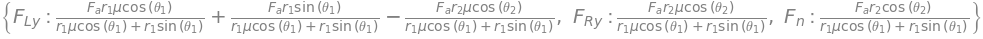

In [2]:
# Solve the system of equations
solution = sp.solve([eq1, eq2, eq3], (F_L_y, F_R_y, F_n))

display(eq1, eq2, eq3)
solution

In [3]:
F_n_solution = solution[F_n]
F_L_y_solution = solution[F_L_y]
F_R_y_solution = solution[F_R_y]
sp.simplify(F_R_y_solution + F_L_y_solution) # check force balance in vertical direction.


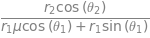

In [4]:
# force multiplier
F_mult = F_n_solution / F_a
F_mult

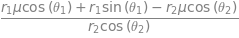

In [5]:
# apparent coeff. of friction on left side:
mu_l = sp.simplify(F_L_y_solution / F_n_solution)
mu_l

### Test particular values for $\theta_1, \theta_2, r_1, r_2, \mu$

Let:

$
r1 = 4 \\
\theta_1 = 10 \\
r2 = 6 \\
\theta_2 = 60 \\
\mu = 0.4 \\
F_a = 12 \text{ kn} 
$

(It seems the coeff. of friction for aluminum on granite is somewhere between 0.4 and 0.6 can anyone confirm?)

In [6]:
th1_val = np.radians(10) # 10 degrees
th2_val = np.radians(60) # 60 degrees 
sub_dict = {theta1: th1_val, theta2: th2_val, mu: 0.4, F_a:12, r1:4, r2:6}

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def draw_triangle(r1, theta1, r2, theta2):
    """
    Draws a triangle with one vertex at the origin, with the first side defined
    by the polar coordinates (r1, theta1) and the second side defined by (r2, theta2).
    The triangle is drawn with a red border and a white-filled interior.

    Parameters:
    r1 (float): Radius of the first side in polar coordinates.
    theta1 (float): Angle of the first side in polar coordinates (in radians).
    r2 (float): Radius of the second side in polar coordinates.
    theta2 (float): Angle of the second side in polar coordinates (in radians).
    """
    
    # Convert polar coordinates to Cartesian coordinates
    x1, y1 = r1 * np.cos(theta1), r1 * np.sin(theta1)
    x2, y2 = r2 * np.cos(theta2), r2 * np.sin(theta2)

    # Define the vertices of the triangle
    vertices = np.array([[0, 0], [x1, y1], [x2, y2]])

    # Create the triangle with red border and white fill
    plt.figure()
    plt.fill(vertices[:, 0], vertices[:, 1], edgecolor='grey', facecolor='grey')

    # Set equal scaling
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.title("Triangle")
    plt.show()

# Example usage
# draw_triangle(3, np.pi / 4, 2, np.pi / 3)

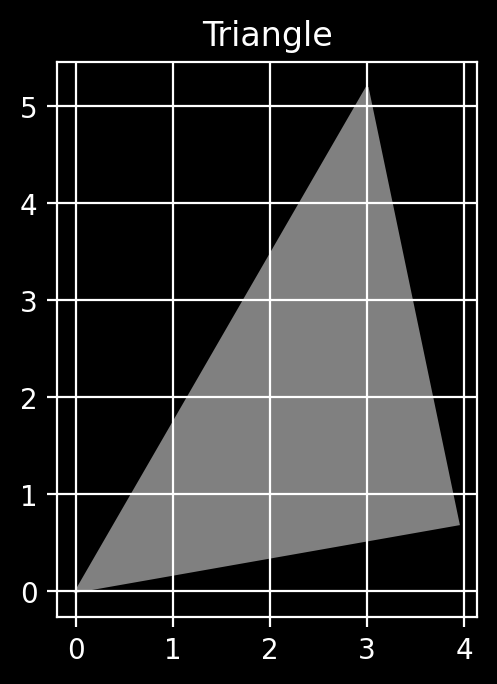

In [8]:
draw_triangle(sub_dict[r1], sub_dict[theta1], sub_dict[r2], sub_dict[theta2])

In [9]:
from IPython.display import display, Math

F_L_y_val = float(solution[F_L_y].subs(sub_dict).evalf())
F_R_y_val = float(solution[F_R_y].subs(sub_dict).evalf())
F_n_val =  float(solution[F_n].subs(sub_dict).evalf())
F_mult_val = float(F_mult.subs(sub_dict).evalf())
mu_l_val = float(mu_l.subs(sub_dict).evalf())

latex_str = fr"""
F_{{Ly}} = {F_L_y_val:.2f}, \quad 
F_{{Ry}} = {F_R_y_val:.2f}, \quad 
F_n = {F_n_val:.2f}, \quad
F_{{\text{{mult}}}} = {F_mult_val:.2f}, \quad
\mu_l = {mu_l_val:.2f}
"""
display(Math(latex_str))

<IPython.core.display.Math object>

- **Note this gives a force multiplier of 1.32 compared to 2 for a SLCD** 

- *However, the geometry of this triangle does not match exactly a tricam, and there are some subtleties in the way the cam strap acts on the device. I have found that for a variety of triangle geometries the outward force multiplier appears to be consistently less than 4*.